In [85]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv('water_potability.csv')

In [99]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [101]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [102]:
df['ph']=df.ph.fillna(df['ph'].mean())
df['Sulfate']=df.Sulfate.fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df.Trihalomethanes.fillna(df['Trihalomethanes'].mean())

In [103]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [104]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [105]:
df.duplicated().sum()

0

# EDA

<AxesSubplot:xlabel='Potability', ylabel='count'>

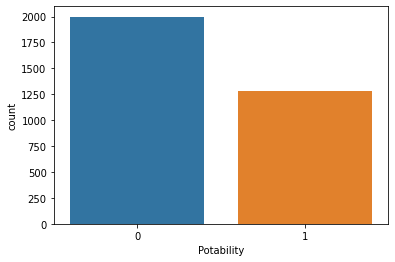

In [106]:
sn.countplot(df['Potability'],data=df)

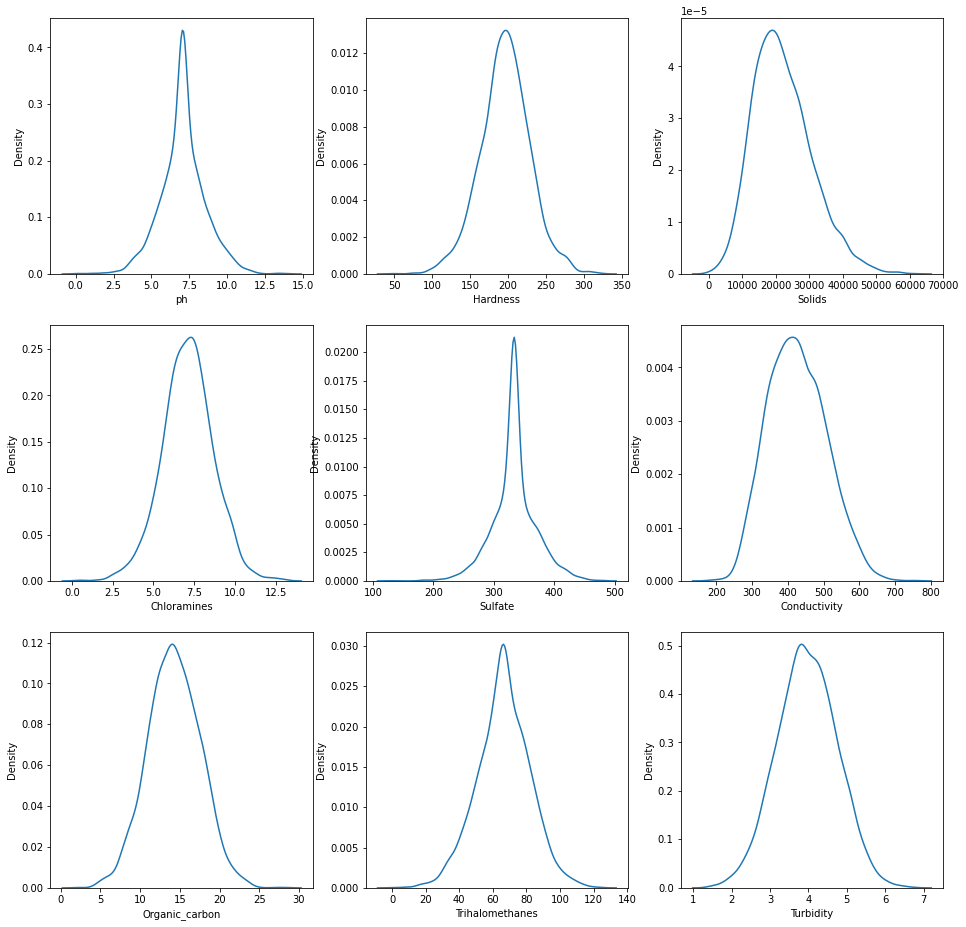

In [110]:
plt.figure(figsize=(16,16))
data=df.drop('Potability',axis=True)
for i,column in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sn.distplot(data[column],hist=False)

<Figure size 720x1152 with 0 Axes>

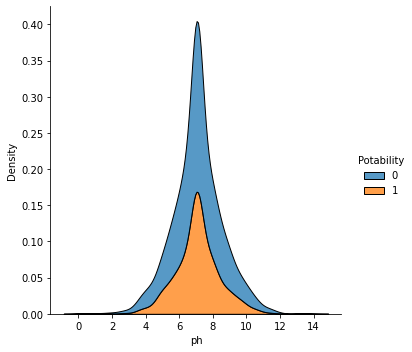

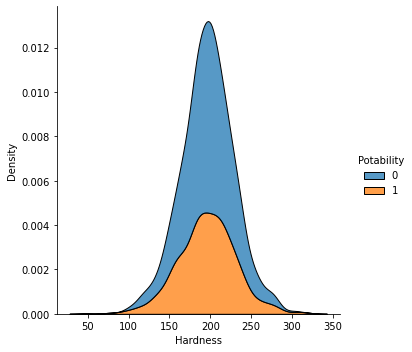

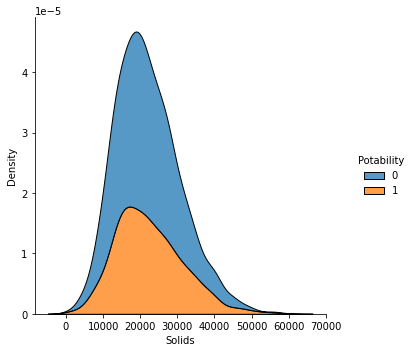

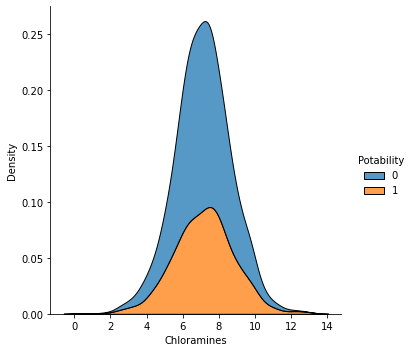

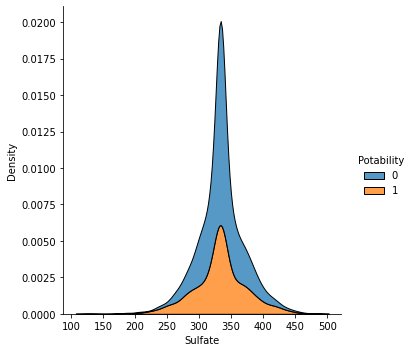

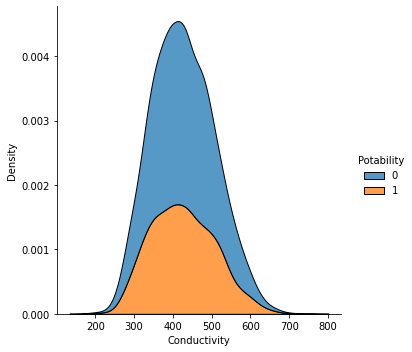

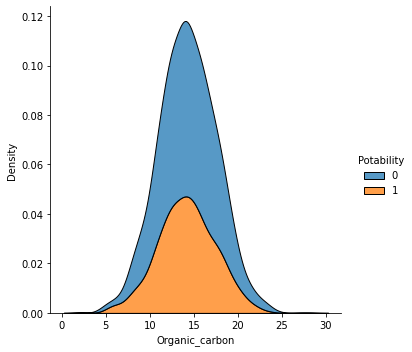

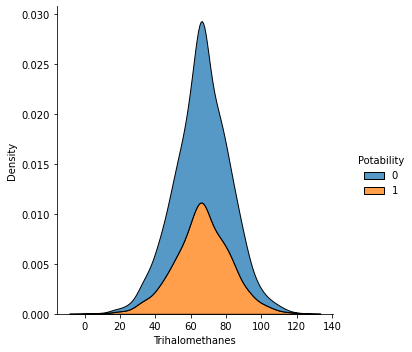

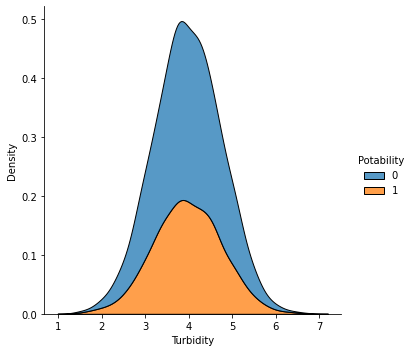

In [112]:
plt.figure(figsize=(10,16))
for i,column in enumerate(data.columns,1):
    sns.displot(df,x=data[column], hue="Potability", kind="kde", multiple="stack")

<AxesSubplot:>

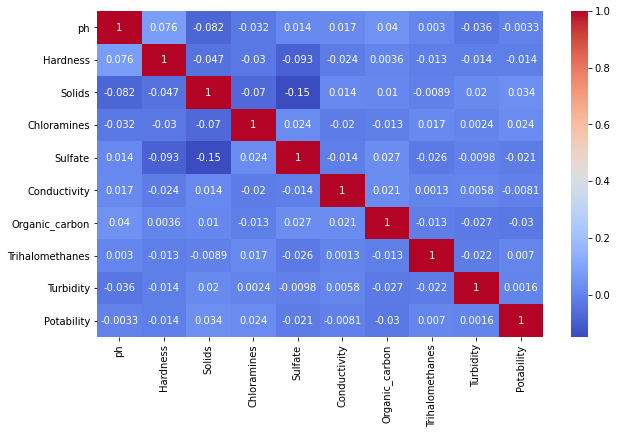

In [116]:
plt.figure(figsize=(10,6))
sn.heatmap(df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:>

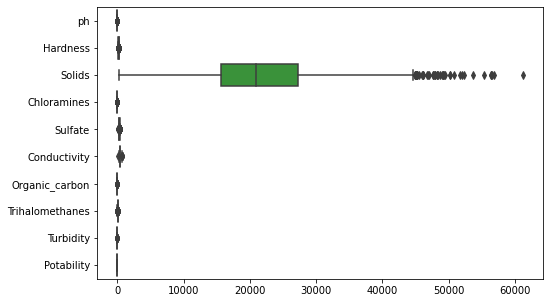

In [127]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,orient='h')

<AxesSubplot:xlabel='Solids'>

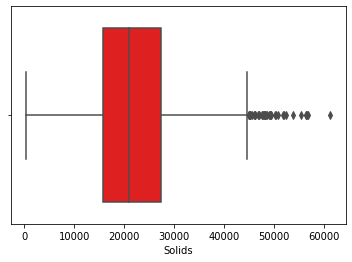

In [132]:
sn.boxplot(df['Solids'],orient='h',color='Red')

# Removing Outliers

In [135]:
from scipy import stats
z_score=np.abs(stats.zscore(df))

In [136]:
z_score

array([[6.04313345e-16, 2.59194711e-01, 1.39470871e-01, ...,
        1.30614943e+00, 1.28629758e+00, 7.99774743e-01],
       [2.28933938e+00, 2.03641367e+00, 3.85986650e-01, ...,
        6.38479983e-01, 6.84217891e-01, 7.99774743e-01],
       [6.92867789e-01, 8.47664833e-01, 2.40047337e-01, ...,
        1.50940884e-03, 1.16736546e+00, 7.99774743e-01],
       ...,
       [1.59125368e+00, 6.26829230e-01, 1.27080989e+00, ...,
        2.18748247e-01, 8.56006782e-01, 1.25035206e+00],
       [1.32951593e+00, 1.04135450e+00, 1.14405809e+00, ...,
        7.03468419e-01, 9.50797383e-01, 1.25035206e+00],
       [5.40150905e-01, 3.85462310e-02, 5.25811937e-01, ...,
        7.80223466e-01, 2.12445866e+00, 1.25035206e+00]])

In [140]:
threshold=3
print(np.where(z_score>3))

(array([  37,   61,   66,   80,   88,  104,  140,  245,  253,  263,  263,
        272,  272,  275,  275,  278,  283,  285,  287,  304,  317,  321,
        330,  335,  342,  345,  347,  351,  351,  354,  357,  365,  366,
        379,  382,  383,  385,  434,  492,  509,  531,  546,  666,  680,
        692,  703,  726,  757,  781,  783,  785,  786,  810,  810,  951,
        990, 1031, 1068, 1073, 1075, 1077, 1106, 1123, 1156, 1157, 1186,
       1186, 1290, 1292, 1303, 1316, 1343, 1353, 1360, 1366, 1384, 1412,
       1490, 1523, 1537, 1542, 1554, 1554, 1563, 1605, 1630, 1642, 1743,
       1746, 1766, 1773, 1784, 1792, 1798, 1860, 1892, 1955, 2057, 2075,
       2096, 2121, 2134, 2156, 2189, 2204, 2236, 2302, 2318, 2336, 2343,
       2350, 2353, 2370, 2376, 2401, 2424, 2446, 2447, 2470, 2497, 2602,
       2646, 2646, 2681, 2694, 2699, 2704, 2726, 2757, 2853, 2861, 2868,
       2895, 2899, 2921, 2925, 2928, 2945, 2949, 3014, 3014, 3017, 3020,
       3035, 3042, 3088, 3094, 3130, 3142, 3150, 3

In [143]:
df_clean=df[(z_score<3).all(axis=1)]

In [146]:
df_clean.shape

(3128, 10)

In [148]:
df.shape

(3276, 10)

<AxesSubplot:>

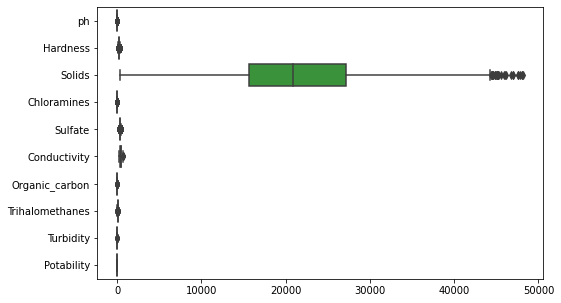

In [150]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean,orient='h')

# Building a Model

In [153]:
x=df.drop(['Potability'],axis=True)
y=df['Potability']

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [161]:
from sklearn.preprocessing import MinMaxScaler
mscale=MinMaxScaler()
mscale.fit_transform(x_train)
mscale.transform(x_test)

array([[0.52290591, 0.70904283, 0.1475407 , ..., 0.49796991, 0.503682  ,
        0.79271432],
       [0.52290591, 0.35668855, 0.20655382, ..., 0.40343007, 0.39589532,
        0.4785082 ],
       [0.60021906, 0.56453691, 0.20658881, ..., 0.61598763, 0.63435267,
        0.52415128],
       ...,
       [0.52290591, 0.62897739, 0.43952895, ..., 0.45159905, 0.53267262,
        0.79544663],
       [0.604518  , 0.70204106, 0.3787324 , ..., 0.41800425, 0.45574452,
        0.39498075],
       [0.49595158, 0.52859895, 0.25253908, ..., 0.600212  , 0.68516259,
        0.66826598]])

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [166]:
keys = ['KNN','LogisticRegression','DecisionTree','Randomforest','supportvector','Gaussian']
values = [KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]
models = dict(zip(keys,values))
print(models)

{'KNN': KNeighborsClassifier(), 'LogisticRegression': LogisticRegression(), 'DecisionTree': DecisionTreeClassifier(), 'Randomforest': RandomForestClassifier(), 'supportvector': SVC(), 'Gaussian': GaussianNB()}


In [167]:
for name,algo in models.items():
    model = algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = model.score(x_train,y_train)
    print(name,acc)

KNN 0.7152202354993459
LogisticRegression 0.6144788486698648
DecisionTree 1.0
Randomforest 1.0
supportvector 0.6140427387701701
Gaussian 0.6371565634539904


In [177]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
test_score=clf.score(x_test,y_test)
y_pred=clf.predict(x_test)

print("The score is:", test_score)

The score is: 0.6632756866734486


In [179]:
from sklearn.metrics import confusion_matrix

In [180]:
cm=confusion_matrix(y_test,y_pred)

In [181]:
cm

array([[517,  73],
       [258, 135]], dtype=int64)

<AxesSubplot:>

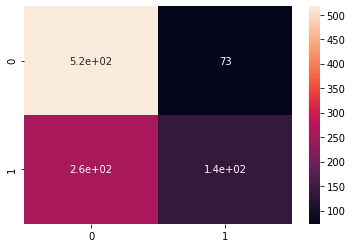

In [182]:
sn.heatmap(cm,annot=True)